# Beispiel 9: a) Lineare Regression

Folgende Modelldaten beschreiben die Anreicherungen des Schadstoffs PCB in Forellen (Quelle: SCIENCE, 1972, 117, 1192-1, 193). Das Alter der Tiere findet sich in Spalte 1, die gemessene Schadstoffkonzentration (ppm) in Spalte 2:

In [1]:
PCBData=[1.00000    0.60000;
    1.00000    1.60000;
    1.00000    0.50000;
    1.00000    1.20000;
    2.00000    2.00000;
    2.00000    1.30000;
    2.00000    2.50000;
    3.00000    2.20000;
    3.00000    2.40000;
    3.00000    1.20000;
    4.00000    3.50000;
    4.00000    4.10000;
    4.00000    5.10000;
    5.00000    5.70000;
    6.00000    3.40000;
    6.00000    9.70000;
    6.00000    8.60000;
    7.00000    4.00000;
    7.00000    5.50000;
    7.00000   10.50000;
    8.00000   17.50000;
    8.00000   13.40000;
    8.00000    4.50000;
    9.00000   30.40000;
   11.00000   12.40000;
   12.00000   13.40000;
   12.00000   26.20000;
   12.00000    7.40000;];


### Visualisierung 
a) Darstellung der Originaldaten:

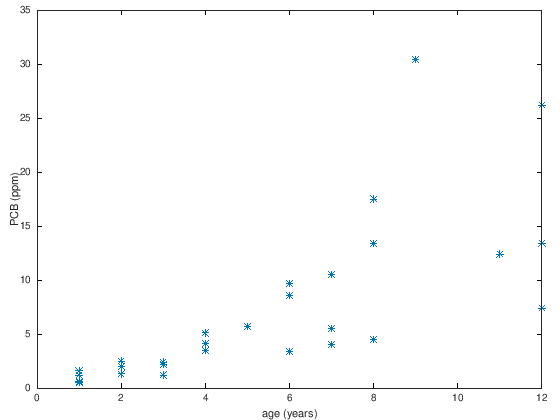

In [2]:
age = PCBData(:,1);
pcb = PCBData(:,2);
plot(age, pcb, "*" )
xlabel("age (years)")
ylabel("PCB (ppm)")


b) Nach Logarithmieren der Konzentration:

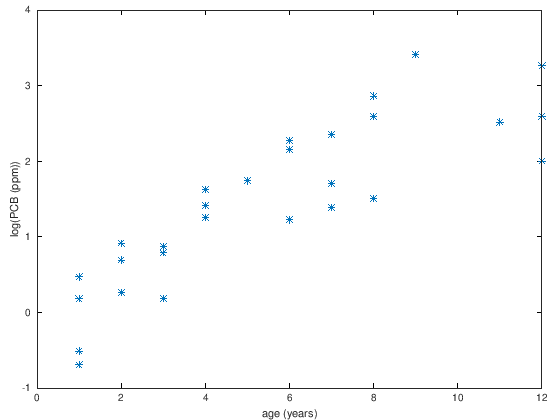

In [3]:
plot(age, log(pcb), "*" )
xlabel("age (years)")
ylabel("log(PCB (ppm))")

c) Anpassung des Alters:


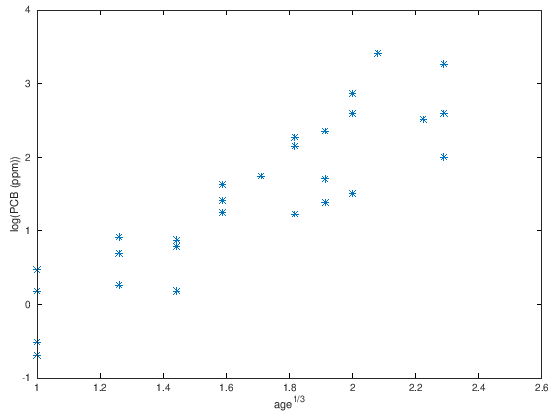

In [4]:
plot(age.^(1/3), log(pcb), "*" )
xlabel("age^{1/3}")
ylabel("log(PCB (ppm))")

## Ausgleichsproblem:

Die obige Grafik legt einen linearen Zusammenhang nahe. Für die entsprechende Ausgleichsgerade machen wir den Ansatz $$\theta_1 + \theta_2 (age)^{1/3}  \approx log (pcb) $$ und erhalten ein lineares Ausgleichsproblem der Form:
$$ A \vec \theta \approx \vec b$$


In [5]:
b = log(pcb);
n=length(b);
A=ones(n,2);
A(:,2) = age.^(1/3)
b

A =

   1.0000   1.0000
   1.0000   1.0000
   1.0000   1.0000
   1.0000   1.0000
   1.0000   1.2599
   1.0000   1.2599
   1.0000   1.2599
   1.0000   1.4422
   1.0000   1.4422
   1.0000   1.4422
   1.0000   1.5874
   1.0000   1.5874
   1.0000   1.5874
   1.0000   1.7100
   1.0000   1.8171
   1.0000   1.8171
   1.0000   1.8171
   1.0000   1.9129
   1.0000   1.9129
   1.0000   1.9129
   1.0000   2.0000
   1.0000   2.0000
   1.0000   2.0000
   1.0000   2.0801
   1.0000   2.2240
   1.0000   2.2894
   1.0000   2.2894
   1.0000   2.2894

b =

  -0.51083
   0.47000
  -0.69315
   0.18232
   0.69315
   0.26236
   0.91629
   0.78846
   0.87547
   0.18232
   1.25276
   1.41099
   1.62924
   1.74047
   1.22378
   2.27213
   2.15176
   1.38629
   1.70475
   2.35138
   2.86220
   2.59525
   1.50408
   3.41444
   2.51770
   2.59525
   3.26576
   2.00148



## Lösen der Normalengleichung:
Das obige Problem ist überbestimmt. Wir appproximieren dies nun, in dem wir eine quadratische Minimierung formulieren. Der Parametervektor $\vec \theta$, welcher die Zielfunktion  $$\Phi(\vec \theta):= \frac{1}{2}\|b- A \vec \theta\|_2^2$$ minimiert, ist die Lösung der Normalengleichung
$$A^T A \vec \theta = A^T b$$

In [6]:
theta=linsolve(A'*A, A'*b)

theta =

  -2.3907
   2.3005



## Darstellung der Lösung
Die berechnete Ausgleichsgerade wollen wir nun auch darstellen.

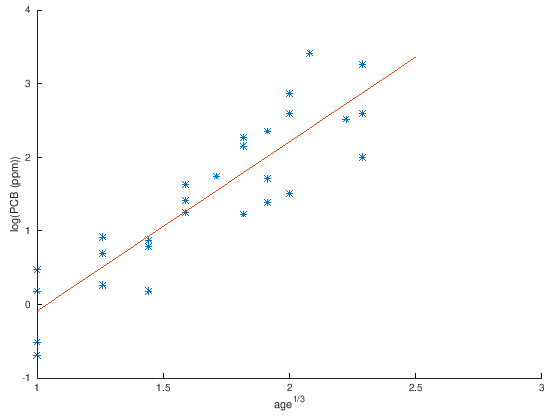

In [7]:
a =linspace(1,2.5,10);
logp = theta(1) + a*theta(2);

hold on
plot(age.^(1/3), log(pcb), "*" )
plot(a, logp)
xlabel("age^{1/3}")
ylabel("log(PCB (ppm))")